In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('/content/titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [10]:
X_train.isnull().mean()

,0
Age,0.196629
Fare,0.050562
Family,0.000000


In [11]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_age = X_train['Fare'].median()

In [13]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_age)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_age)

In [14]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
79,30.0,12.4750,0,30.0,30.000000,12.4750,12.475000
177,50.0,28.7125,0,50.0,50.000000,28.7125,28.712500
162,26.0,NaN,0,26.0,26.000000,14.4000,29.498846
451,NaN,19.9667,1,14.4,29.498846,19.9667,19.966700
458,50.0,10.5000,0,50.0,50.000000,10.5000,10.500000


In [15]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  210.2517072477438
Age Variance after median imputation:  204.91494514688827
Age Variance after mean imputation:  168.8519336687225
Original Fare variable variance:  2761.031434948639
Fare Variance after median imputation:  2637.01248167777
Fare Variance after mean imputation:  2621.6705110298403


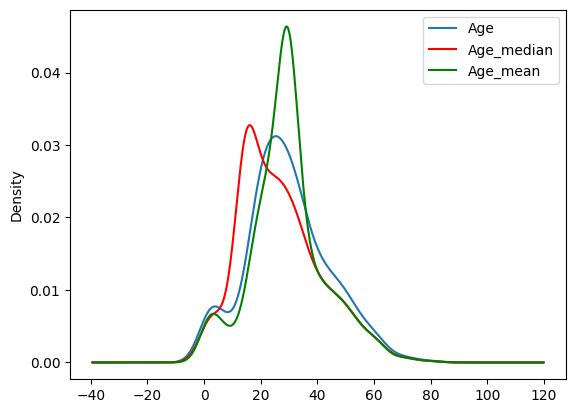

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

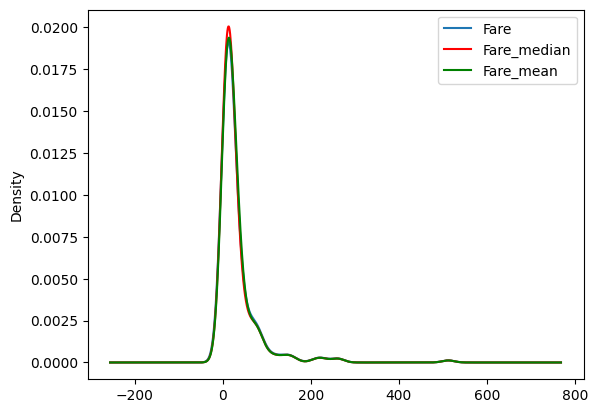

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [18]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.008529
Fare,75.481375,2761.031435,18.599163,97.632173,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.328300,-5.616299,17.672035,17.659866
Age_median,210.251707,97.632173,-5.328300,204.914945,168.851934,90.996224,92.406745
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.026540
Fare_median,70.082085,2761.031435,17.672035,90.996224,56.282518,2637.012482,2623.861792
Fare_mean,71.008529,2761.031435,17.659866,92.406745,57.026540,2623.861792,2621.670511


In [20]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.087232,0.088692
Fare,0.091482,1.000000,0.207193,0.129700,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.221228,-0.256883,0.204536,0.204992
Age_median,1.000000,0.129700,-0.221228,1.000000,0.907750,0.123789,0.126075
Age_mean,1.000000,0.088151,-0.256883,0.907750,1.000000,0.084346,0.085711
Fare_median,0.087232,1.000000,0.204536,0.123789,0.084346,1.000000,0.997920
Fare_mean,0.088692,1.000000,0.204992,0.126075,0.085711,0.997920,1.000000


<Axes: >

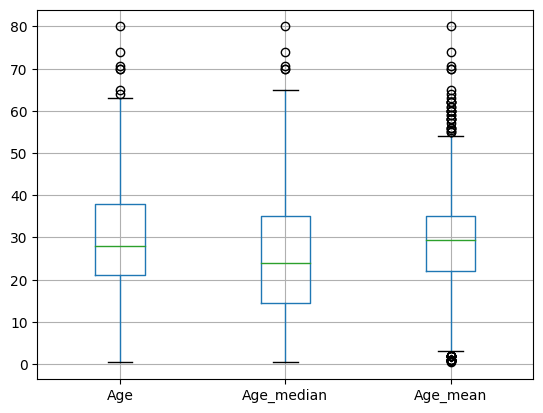

In [21]:
X_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

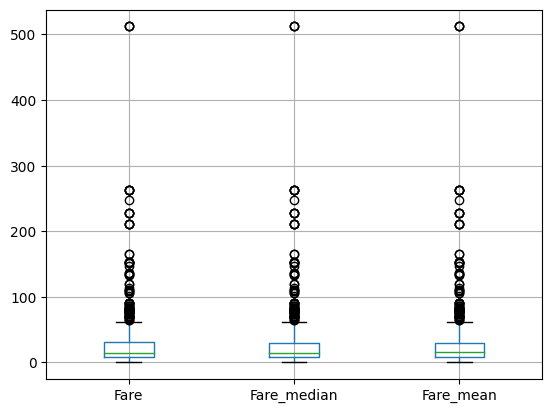

In [22]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

# Using Sklearn

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [25]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
])

In [26]:
trf.fit(X_train)

ColumnTransformer(transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [30]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [28]:
trf.named_transformers_['imputer2'].statistics_

array([32.51778772])

In [31]:
X_train = trf.transform(X_train)
x_test = trf.transform(X_test)

In [32]:
X_train

array([[ 45.5       ,  28.5       ],
       [ 23.        ,  13.        ],
       [ 32.        ,   7.925     ],
       ...,
       [ 41.        ,  32.51778772],
       [ 14.        , 120.        ],
       [ 21.        ,  77.2875    ]])